<a href="https://colab.research.google.com/github/Joshika-Mentor/-Kid-s-Screentime-Visualization-Infosys-springboard-program-/blob/Nagulapalli-S-V-A-Sahithi-Iswarya/kids_screentym_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
import pandas as pd

# ✅ Mount Google Drive
drive.mount('/content/drive')

# ✅ Path to your CSV file inside Drive
file_path = '/content/drive/MyDrive/Indian_Kids_Screen_Time.csv'

# ✅ Read CSV
df = pd.read_csv(file_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print("First 5 rows:\n", df.head())
print("\nLast 5 rows:\n", df.tail())
print("\nRandom 5 rows:\n", df.sample(5))


First 5 rows:
    Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
0   14    Male                      3.99     Smartphone   
1   11  Female                      4.61         Laptop   
2   18  Female                      3.73             TV   
3   15  Female                      1.21         Laptop   
4   12  Female                      5.89     Smartphone   

   Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
0                        True                               0.42   
1                        True                               0.30   
2                        True                               0.32   
3                       False                               0.39   
4                        True                               0.49   

           Health_Impacts Urban_or_Rural  
0  Poor Sleep, Eye Strain          Urban  
1              Poor Sleep          Urban  
2              Poor Sleep          Urban  
3                     NaN          Urban  
4     

In [4]:
print("\nShape (rows, cols):", df.shape)
print("\nColumn Names:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFull Info:")
print(df.info())


Shape (rows, cols): (9712, 8)

Column Names:
 Index(['Age', 'Gender', 'Avg_Daily_Screen_Time_hr', 'Primary_Device',
       'Exceeded_Recommended_Limit', 'Educational_to_Recreational_Ratio',
       'Health_Impacts', 'Urban_or_Rural'],
      dtype='object')

Data Types:
 Age                                    int64
Gender                                object
Avg_Daily_Screen_Time_hr             float64
Primary_Device                        object
Exceeded_Recommended_Limit              bool
Educational_to_Recreational_Ratio    float64
Health_Impacts                        object
Urban_or_Rural                        object
dtype: object

Full Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 

In [5]:
# Numeric + categorical summary
print("\nSummary Stats:\n", df.describe(include="all"))


Summary Stats:
                 Age Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
count   9712.000000   9712               9712.000000           9712   
unique          NaN      2                       NaN              4   
top             NaN   Male                       NaN     Smartphone   
freq            NaN   4942                       NaN           4568   
mean      12.979201    NaN                  4.352837            NaN   
std        3.162437    NaN                  1.718232            NaN   
min        8.000000    NaN                  0.000000            NaN   
25%       10.000000    NaN                  3.410000            NaN   
50%       13.000000    NaN                  4.440000            NaN   
75%       16.000000    NaN                  5.380000            NaN   
max       18.000000    NaN                 13.890000            NaN   

       Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
count                        9712                        9

In [6]:
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nMode:\n", df.mode().iloc[0])  # first mode row


Mean:
 Age                                  12.979201
Avg_Daily_Screen_Time_hr              4.352837
Exceeded_Recommended_Limit            0.854716
Educational_to_Recreational_Ratio     0.427226
dtype: float64

Median:
 Age                                  13.00
Avg_Daily_Screen_Time_hr              4.44
Exceeded_Recommended_Limit            1.00
Educational_to_Recreational_Ratio     0.43
dtype: float64

Mode:
 Age                                          17
Gender                                     Male
Avg_Daily_Screen_Time_hr                    0.0
Primary_Device                       Smartphone
Exceeded_Recommended_Limit                 True
Educational_to_Recreational_Ratio          0.45
Health_Impacts                       Poor Sleep
Urban_or_Rural                            Urban
Name: 0, dtype: object


In [7]:
# Check null values in each column
print("Null values in each column:")
print(df.isnull().sum())

# Check if any null exists in the dataset
print("\nAny null values in dataset?")
print(df.isnull().any().any())

Null values in each column:
Age                                     0
Gender                                  0
Avg_Daily_Screen_Time_hr                0
Primary_Device                          0
Exceeded_Recommended_Limit              0
Educational_to_Recreational_Ratio       0
Health_Impacts                       3218
Urban_or_Rural                          0
dtype: int64

Any null values in dataset?
True


In [8]:
# Rows containing at least one null
print("Rows with missing values:")
print(df[df.isnull().any(axis=1)])

Rows with missing values:
      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
3      15  Female                      1.21         Laptop   
6      17    Male                      2.97             TV   
7      10    Male                      2.74             TV   
19      9  Female                      0.00             TV   
22      9  Female                      1.63         Tablet   
...   ...     ...                       ...            ...   
9695   12  Female                      2.69     Smartphone   
9697   16  Female                      4.74     Smartphone   
9699   10  Female                      2.85             TV   
9701   16    Male                      6.08     Smartphone   
9706    8    Male                      4.84     Smartphone   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
3                          False                               0.39   
6                          False                               0.48   
7               

In [9]:
# iloc - by position
print(df.iloc[2])        # Third row
print(df.iloc[1:4, 0:2]) # Rows 1-3, first 2 columns

# loc - by labels (use exact column names!)
df.columns = df.columns.str.replace(" ", "_")  # Standardize
print(df.loc[:3, ["Age", "Avg_Daily_Screen_Time_hr"]])

# Column slicing
print(df["Age"][:3])

Age                                          18
Gender                                   Female
Avg_Daily_Screen_Time_hr                   3.73
Primary_Device                               TV
Exceeded_Recommended_Limit                 True
Educational_to_Recreational_Ratio          0.32
Health_Impacts                       Poor Sleep
Urban_or_Rural                            Urban
Name: 2, dtype: object
   Age  Gender
1   11  Female
2   18  Female
3   15  Female
   Age  Avg_Daily_Screen_Time_hr
0   14                      3.99
1   11                      4.61
2   18                      3.73
3   15                      1.21
0    14
1    11
2    18
Name: Age, dtype: int64


In [10]:
# Single column slice
print(df["Age"][:3])

# Multiple columns slice using loc
print(df.loc[:3, ["Age", "Gender"]])

0    14
1    11
2    18
Name: Age, dtype: int64
   Age  Gender
0   14    Male
1   11  Female
2   18  Female
3   15  Female


In [11]:
# Kids with more than 5 hours screen time
high_screen_time = df[df["Avg_Daily_Screen_Time_hr"] > 5]
print(high_screen_time)

      Age  Gender  Avg_Daily_Screen_Time_hr Primary_Device  \
4      12  Female                      5.89     Smartphone   
13     11    Male                      6.08             TV   
14     15    Male                      6.15     Smartphone   
16     10  Female                      7.10     Smartphone   
17     13  Female                      6.98     Smartphone   
...   ...     ...                       ...            ...   
9703    9    Male                      6.62     Smartphone   
9705    9  Female                      8.07             TV   
9709   16    Male                      5.62     Smartphone   
9710   17    Male                      5.60             TV   
9711   15  Female                      6.12             TV   

      Exceeded_Recommended_Limit  Educational_to_Recreational_Ratio  \
4                           True                               0.49   
13                          True                               0.48   
14                          True          

In [12]:
df['Gender'] = df['Gender'].astype('category')
df['Urban_or_Rural'] = df['Urban_or_Rural'].astype('category')
print(df.dtypes)

Age                                     int64
Gender                               category
Avg_Daily_Screen_Time_hr              float64
Primary_Device                         object
Exceeded_Recommended_Limit               bool
Educational_to_Recreational_Ratio     float64
Health_Impacts                         object
Urban_or_Rural                       category
dtype: object


In [13]:
print(df['Gender'].cat.categories)
print(df['Urban_or_Rural'].cat.categories)

Index(['Female', 'Male'], dtype='object')
Index(['Rural', 'Urban'], dtype='object')


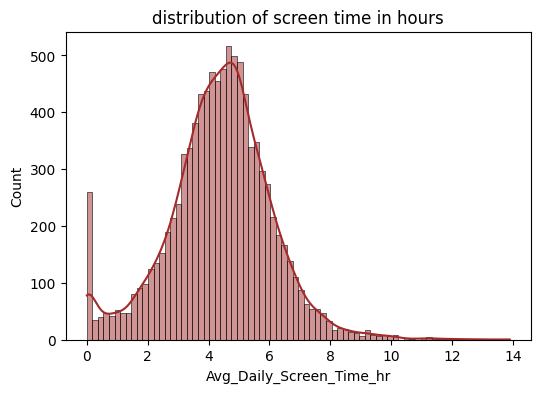

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['Avg_Daily_Screen_Time_hr'], kde=True, color="brown")
plt.title("distribution of screen time in hours")
plt.show()

In [15]:
!pip install seaborn matplotlib

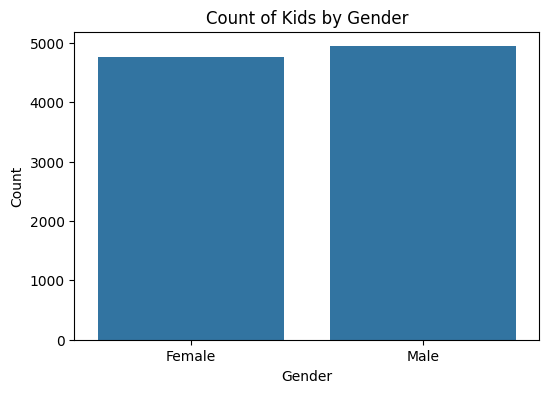

In [16]:
#Countplot for gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Gender')
plt.title('Count of Kids by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-1964819700.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set2')


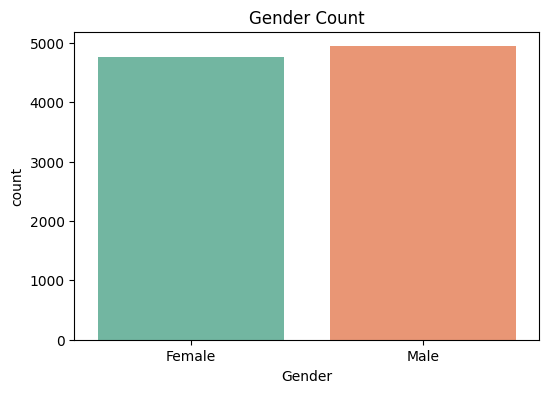

/tmp/ipython-input-1964819700.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Urban_or_Rural', data=df, palette='Set3')


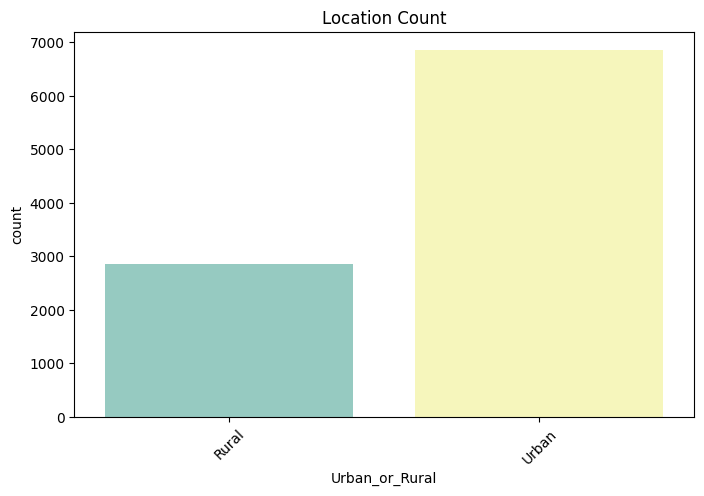

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Gender Countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df, palette='Set2')
plt.title("Gender Count")
plt.show()

# ✅ Location Countplot
plt.figure(figsize=(8,5))
sns.countplot(x='Urban_or_Rural', data=df, palette='Set3')
plt.title("Location Count")
plt.xticks(rotation=45)  # rotate labels if they are long
plt.show()


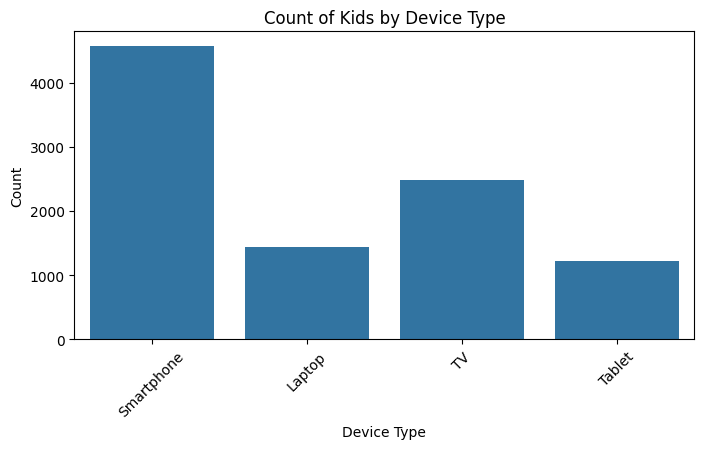

In [18]:
#countplot for device type
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='Primary_Device')
plt.title('Count of Kids by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels if they overlap
plt.show()

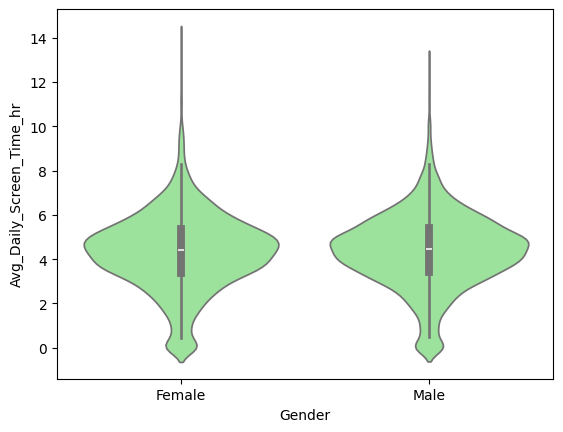

In [19]:
#violin plot for average screen time with respect to Gender
sns.violinplot(x='Gender', y='Avg_Daily_Screen_Time_hr', data=df, color='lightgreen')
plt.show()


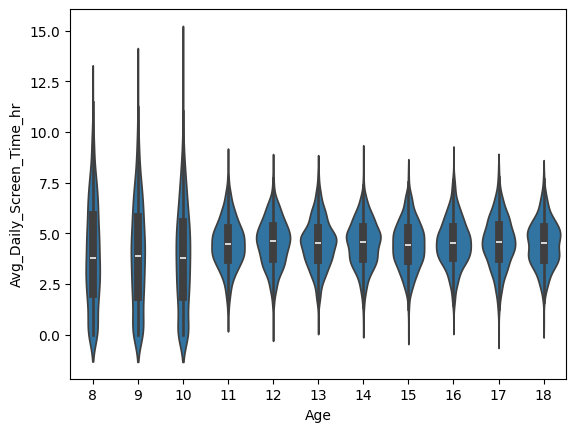

In [20]:
#violin plot for average screen time with respect to Age
sns.violinplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df)
plt.show()


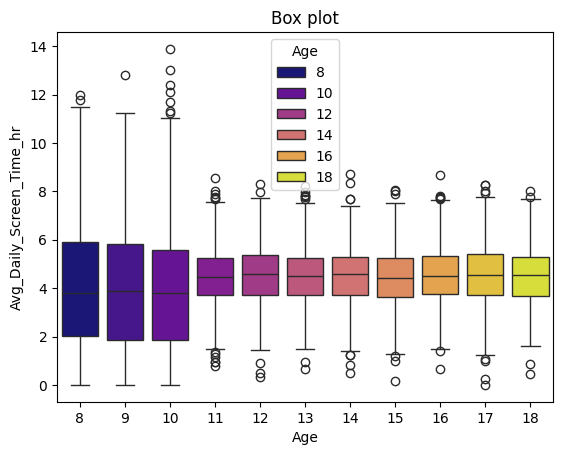

<Figure size 800x500 with 0 Axes>

In [21]:
#box plot for average screen time with respect to Age
sns.boxplot(x='Age', y='Avg_Daily_Screen_Time_hr', data=df,
hue='Age',palette='plasma', legend=True, )
plt.title('Box plot')
plt.figure(figsize=(8,5))
plt.show()


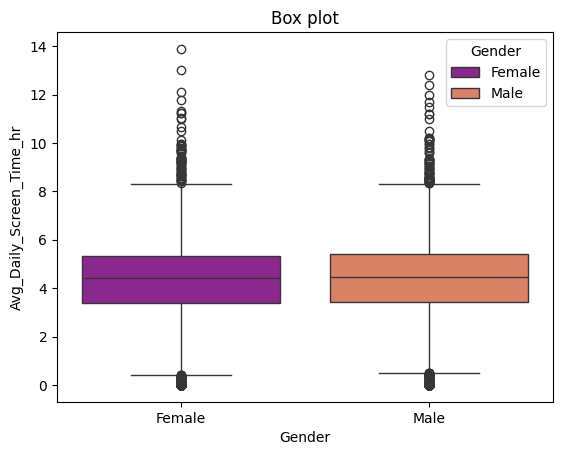

<Figure size 800x500 with 0 Axes>

In [22]:
#box plot for average screen time with respect to Gender
sns.boxplot(x='Gender', y='Avg_Daily_Screen_Time_hr',
data=df, hue='Gender',palette='plasma', legend=True, )
plt.title('Box plot')
plt.figure(figsize=(8,5))
plt.show()



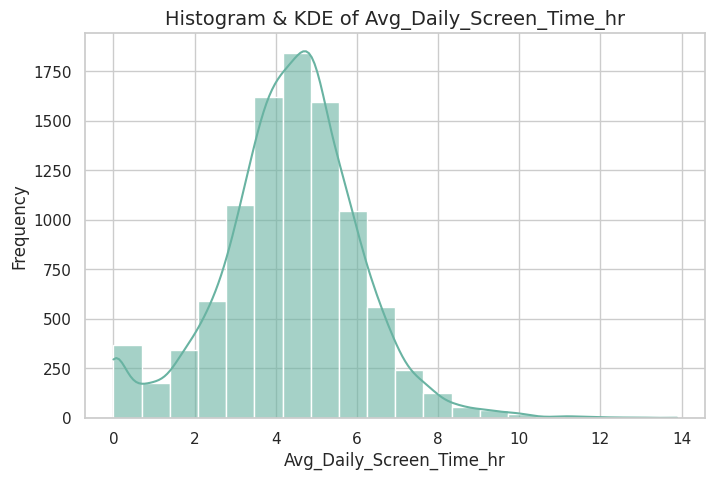

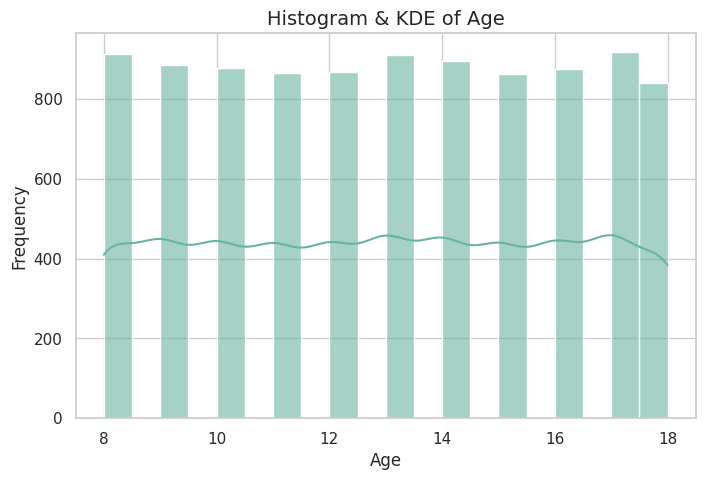

In [23]:
#histogram for continuos variables
# Set style
sns.set(style="whitegrid")

# Continuous variables to plot
continuous_vars = ["Avg_Daily_Screen_Time_hr", "Age"]

for col in continuous_vars:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=20, color="#69b3a2", alpha=0.6)
    plt.title(f"Histogram & KDE of {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


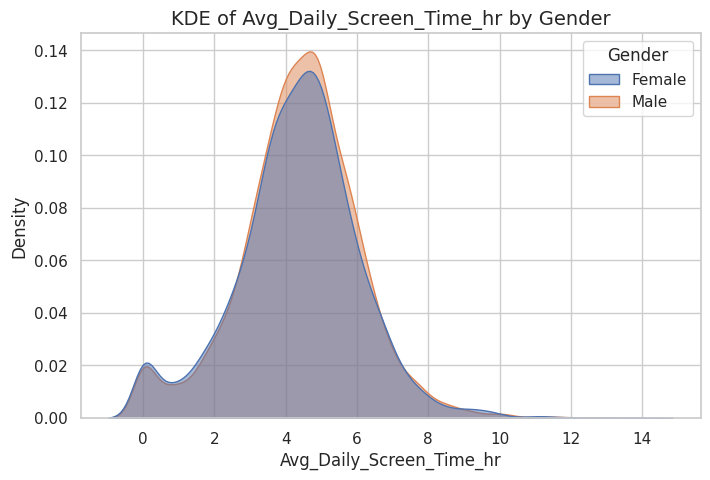

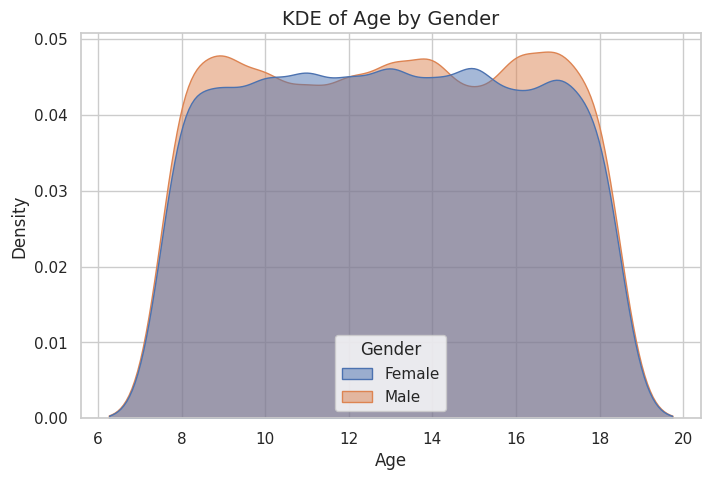

In [24]:
#KDE plots
for col in continuous_vars:
    plt.figure(figsize=(8,5))
    sns.kdeplot(data=df, x=col, hue="Gender", fill=True, alpha=0.5)
    plt.title(f"KDE of {col} by Gender", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()


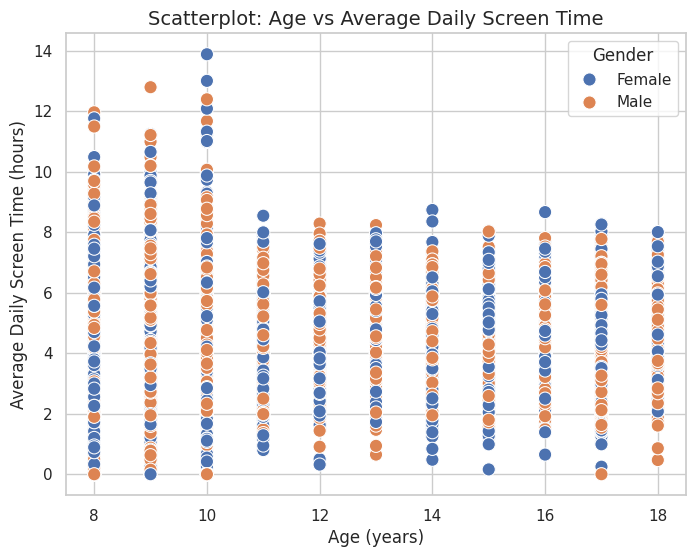

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Avg_Daily_Screen_Time_hr', hue='Gender', s=90)
plt.title("Scatterplot: Age vs Average Daily Screen Time", fontsize=14)
plt.xlabel("Age (years)")
plt.ylabel("Average Daily Screen Time (hours)")
plt.grid(True)
plt.show()


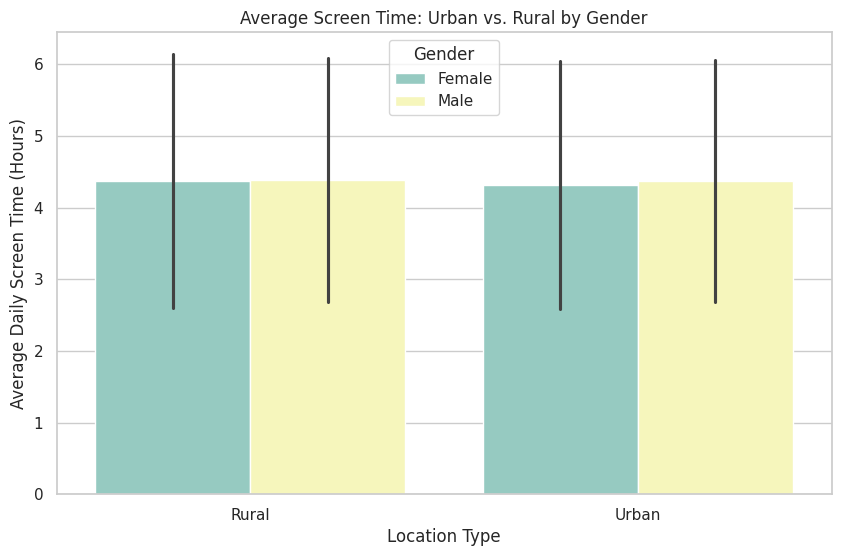

In [26]:
# Bar plot location Vs screen time differ by Gender
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Urban_or_Rural',
    y='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    palette='Set3',
    errorbar='sd'
)
plt.title('Average Screen Time: Urban vs. Rural by Gender')
plt.xlabel('Location Type')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.legend(title='Gender')
plt.show()



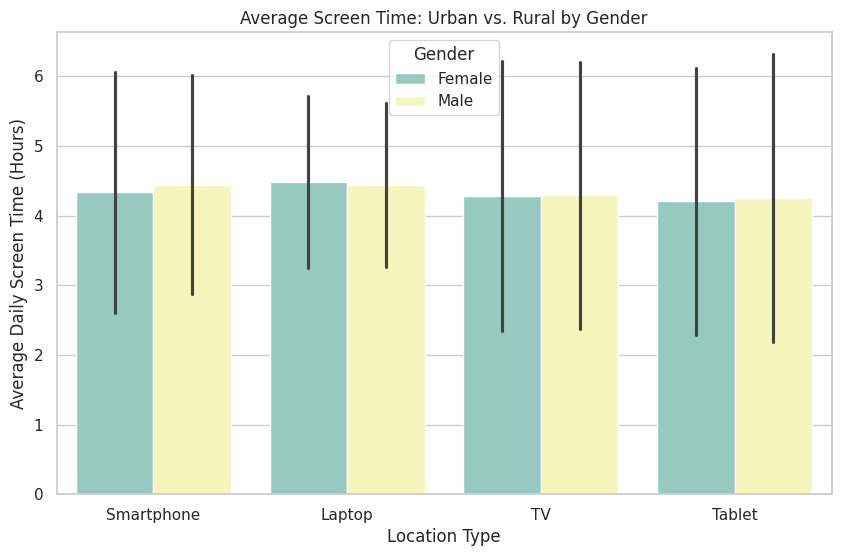

In [27]:
# Bar plot Primary device Vs screen time differ by Gender
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='Primary_Device',
    y='Avg_Daily_Screen_Time_hr',
    hue='Gender',
    palette='Set3',
    errorbar='sd'
)
plt.title('Average Screen Time: Urban vs. Rural by Gender')
plt.xlabel('Location Type')
plt.ylabel('Average Daily Screen Time (Hours)')
plt.legend(title='Gender')
plt.show()

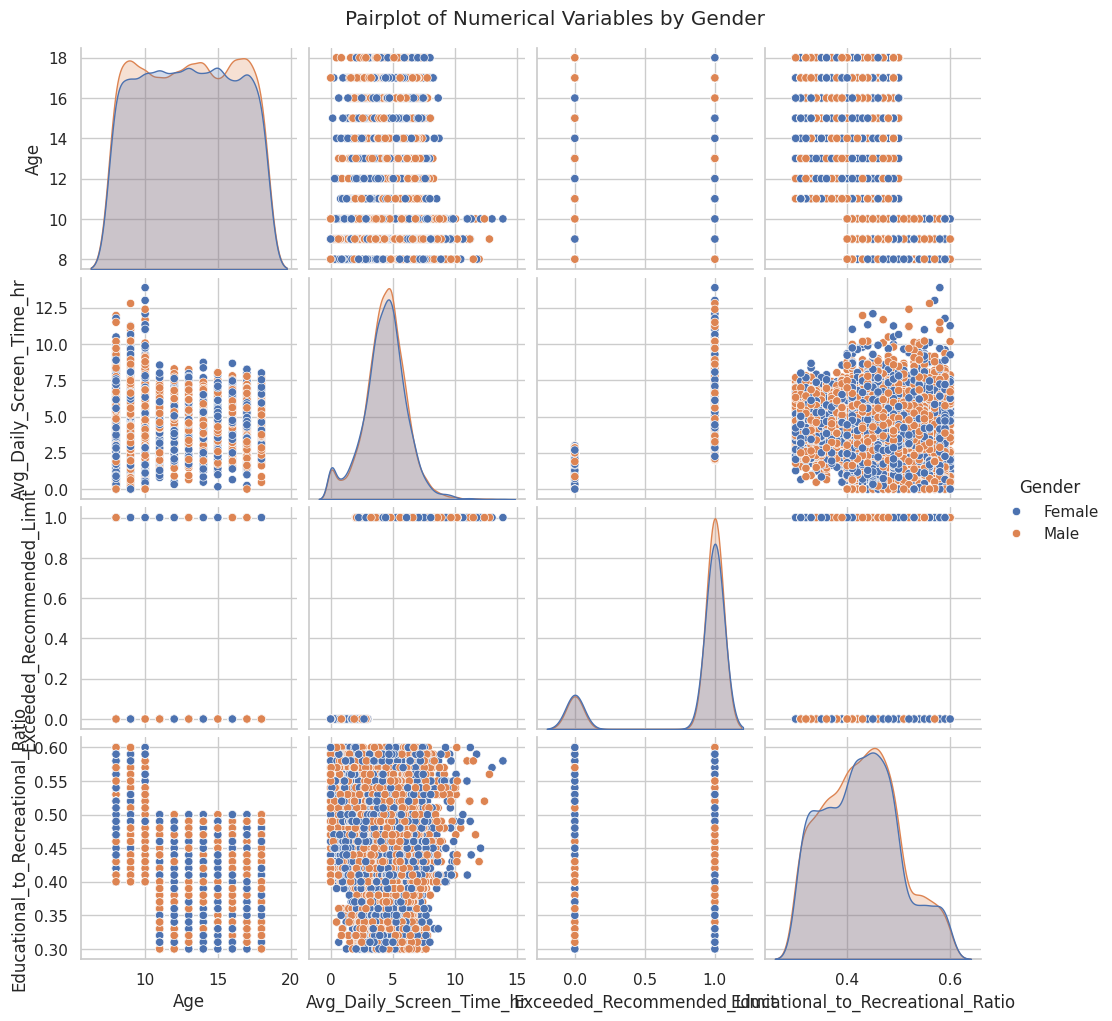

In [28]:
sns.pairplot(df, hue='Gender', palette='deep')
plt.suptitle("Pairplot of Numerical Variables by Gender", y=1.02)
plt.show()


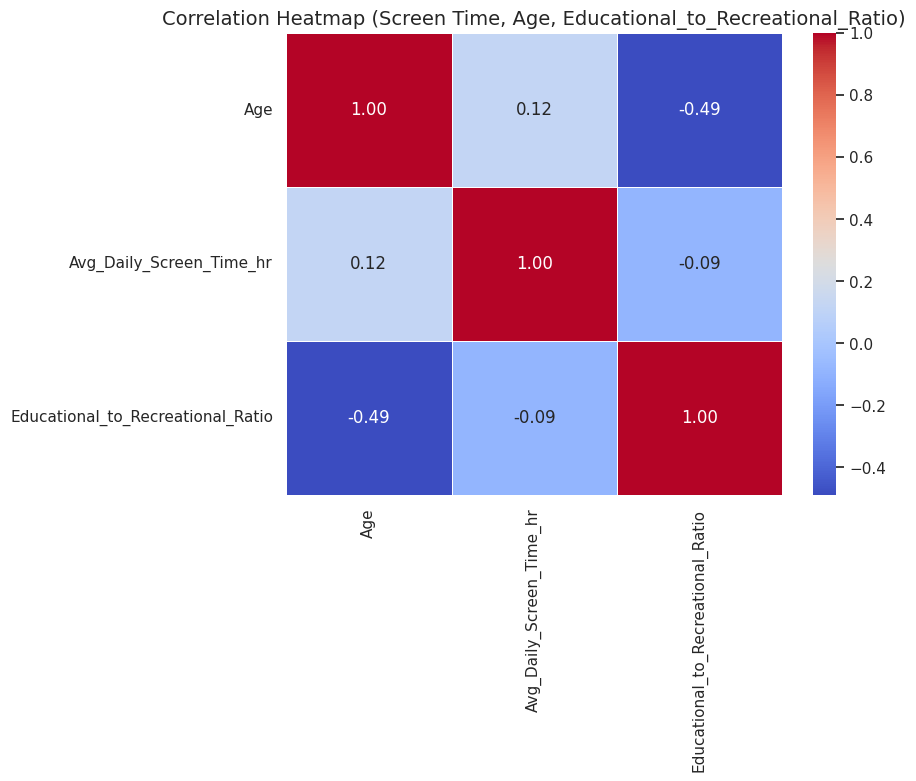

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Select only numerical columns for correlation
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Screen Time, Age, Educational_to_Recreational_Ratio)", fontsize=14)
plt.show()


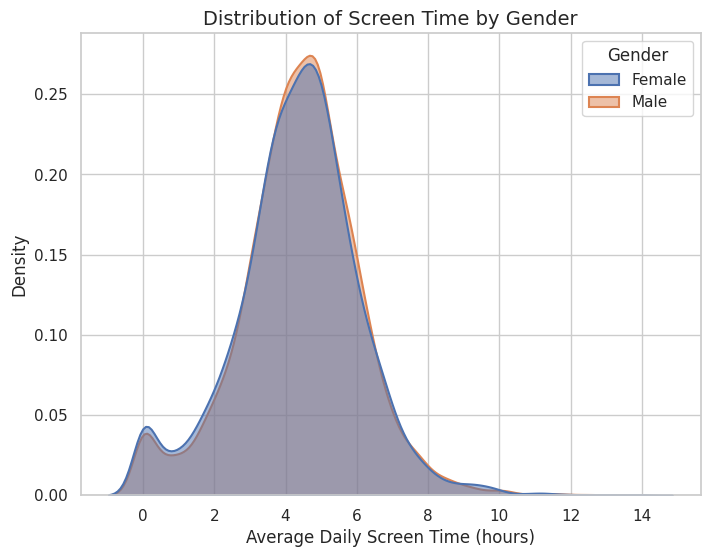

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.kdeplot(
    data=df,
    x="Avg_Daily_Screen_Time_hr",
    hue="Gender",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=1.5
)

plt.title("Distribution of Screen Time by Gender", fontsize=14)
plt.xlabel("Average Daily Screen Time (hours)")
plt.ylabel("Density")
plt.show()

